In [ ]:
%conda env export > environment.yml

In [1]:
import nltk

import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import json
from tqdm import tqdm

from BackTranslation import BackTranslation

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Youtube Comment Scrapping

In [2]:
Video_link = [
   "https://www.youtube.com/watch?v=tiREcHrtDLo",
   "https://www.youtube.com/watch?v=vqgucRK5K1A",
   "https://www.youtube.com/watch?v=mSO2hJln0OY&",
   "https://www.youtube.com/watch?v=smNnhEd26Ek",
   "https://www.youtube.com/watch?v=lcjq7-2zMSA"
]

## Scrapping Youtube Video

In [3]:
all_comments = []

In [4]:
from youtube_comments_scraper import YouTubeCommentScraper
for link in Video_link:
    print(link)
    print("Initializing scraper")
    scraper = YouTubeCommentScraper(headless=True, timeout=10, scroll_pause_time=2, enable_logging=True, return_page_source=False)
    print("Scraping comments")
    comments = scraper.scrape_comments(link, scroll=True)
    print("Comments scraped")
    print("========================================")
    print('Comments :')
    print(comments)
    all_comments.append(comments)
    

https://www.youtube.com/watch?v=tiREcHrtDLo
Initializing scraper
Scraping comments
Comments scraped
Comments :
['Selama ini belajar pake kursus online berbayar ga paham paham konsep model ini, bersyukur nemu channel ini bisa dengan mudah langsung ngerti, terimakasih', 'MasyaAllah, penjelasan bapak meski 3 tahun yang lalu sangat membantu saya dalam belajar machine learning untuk pemula. terimakasih banyak pak, semoga sehat dan berkah selalu. aamiin....', 'bener2 mudah dipahami, saya pernah ikutan bootcamp Machine Learning dan kurg paham sama materinya. bersyukur bggt ketemu playlist ini. Terimakasih banyak pak\n\nmungkin boleh request ke tensorflow pak hehe', 'Bermanfaat banget mas ! kebetulan saya lagi belajar Machine Learning tapi bingung mulai dari mana', 'bisa belajar banyak disini, mudah dipahami, terus hadirkan materi machine learning yang baru, mas.', 'terimakasih mas akhirnya say aham', 'Mantap nih mudah diikuti', 'Mantap baru kemaren, skrg udh rilis lg aja.', 'Done', 'pingin re

In [5]:
# Transform all coment into a single list
all_comments = [comment for comments in all_comments for comment in comments]

In [6]:
# Save all comment into a json
with open('comments.json', 'w') as f:
    json.dump(all_comments, f)
    
print("All comments saved in comments.json")

All comments saved in comments.json


## Preprocessing

In [7]:
# Load all comments from json
with open('comments.json', 'r') as f:
    all_comments = json.load(f)
    
print("All comments loaded from comments.json")

All comments loaded from comments.json


In [8]:
preprocessed_comments = all_comments

In [9]:
preprocessed_comments[0:5]

['Selama ini belajar pake kursus online berbayar ga paham paham konsep model ini, bersyukur nemu channel ini bisa dengan mudah langsung ngerti, terimakasih',
 'MasyaAllah, penjelasan bapak meski 3 tahun yang lalu sangat membantu saya dalam belajar machine learning untuk pemula. terimakasih banyak pak, semoga sehat dan berkah selalu. aamiin....',
 'bener2 mudah dipahami, saya pernah ikutan bootcamp Machine Learning dan kurg paham sama materinya. bersyukur bggt ketemu playlist ini. Terimakasih banyak pak\n\nmungkin boleh request ke tensorflow pak hehe',
 'Bermanfaat banget mas ! kebetulan saya lagi belajar Machine Learning tapi bingung mulai dari mana',
 'bisa belajar banyak disini, mudah dipahami, terus hadirkan materi machine learning yang baru, mas.']

### Cleaning Text

#### Lowercase

In [10]:
preprocessed_comments = [comment.lower() for comment in preprocessed_comments]

In [11]:
preprocessed_comments[0:5]

['selama ini belajar pake kursus online berbayar ga paham paham konsep model ini, bersyukur nemu channel ini bisa dengan mudah langsung ngerti, terimakasih',
 'masyaallah, penjelasan bapak meski 3 tahun yang lalu sangat membantu saya dalam belajar machine learning untuk pemula. terimakasih banyak pak, semoga sehat dan berkah selalu. aamiin....',
 'bener2 mudah dipahami, saya pernah ikutan bootcamp machine learning dan kurg paham sama materinya. bersyukur bggt ketemu playlist ini. terimakasih banyak pak\n\nmungkin boleh request ke tensorflow pak hehe',
 'bermanfaat banget mas ! kebetulan saya lagi belajar machine learning tapi bingung mulai dari mana',
 'bisa belajar banyak disini, mudah dipahami, terus hadirkan materi machine learning yang baru, mas.']

#### Transform to standart Indonesian with backtranslating

In [12]:
translated_comments = []

trans = BackTranslation(url=[
      'translate.google.com',
      'translate.google.co.kr',
    ], proxies={'http': '127.0.0.1:1234', 'http://host.name': '127.0.0.1:4012'})

# Split into 3 batches (API limit)
for i in range(3):
  print(f"Batch {i+1}")
  length = len(preprocessed_comments)//3
  start = i*length
  end = (i+1)*length
  print(f"Start : {start}, End : {end}")
  
  for comments in tqdm(preprocessed_comments[start:end]):
    translated_comment = trans.translate(comments, src='id', tmp='en')
    translated_comments.append(translated_comment)


Batch 1
Start : 0, End : 65


100%|██████████| 65/65 [01:52<00:00,  1.74s/it]


Batch 2
Start : 65, End : 130


100%|██████████| 65/65 [01:58<00:00,  1.82s/it]


Batch 3
Start : 130, End : 195


100%|██████████| 65/65 [01:51<00:00,  1.72s/it]


In [13]:
preprocessed_comments = [translated_comment.result_text for translated_comment in translated_comments]
preprocessed_comments[0:5]

['Sejauh ini, belajar menggunakan kursus online berbayar tidak memahami konsep model ini, bersyukur menemukan saluran ini dapat dengan mudah memahami, terima kasih',
 'MasyaAllah, penjelasan Anda meskipun 3 tahun yang lalu benar -benar membantu saya dalam belajar pembelajaran mesin untuk pemula. Terima kasih banyak, semoga sehat dan memberkati selalu. Amen ....',
 'Sangat mudah dimengerti, saya pernah bergabung dengan pembelajaran mesin bootcamp dan Kurg memahami materi. Sayang untuk menemukan daftar putar ini. Terima kasih banyak Pak\n\nMungkin Anda dapat meminta TensorFlow, Tuan, hehe',
 'Sangat berguna, bro! Saya kebetulan belajar belajar mesin tetapi bingung dari mana',
 'Dapat belajar banyak di sini, mudah dimengerti, terus menyajikan materi pembelajaran mesin baru, MAS.']

#### 2nd Lowercase

In [14]:
preprocessed_comments = [comments.lower() for comments in preprocessed_comments]

In [15]:
preprocessed_comments[0:5]

['sejauh ini, belajar menggunakan kursus online berbayar tidak memahami konsep model ini, bersyukur menemukan saluran ini dapat dengan mudah memahami, terima kasih',
 'masyaallah, penjelasan anda meskipun 3 tahun yang lalu benar -benar membantu saya dalam belajar pembelajaran mesin untuk pemula. terima kasih banyak, semoga sehat dan memberkati selalu. amen ....',
 'sangat mudah dimengerti, saya pernah bergabung dengan pembelajaran mesin bootcamp dan kurg memahami materi. sayang untuk menemukan daftar putar ini. terima kasih banyak pak\n\nmungkin anda dapat meminta tensorflow, tuan, hehe',
 'sangat berguna, bro! saya kebetulan belajar belajar mesin tetapi bingung dari mana',
 'dapat belajar banyak di sini, mudah dimengerti, terus menyajikan materi pembelajaran mesin baru, mas.']

### Remove Punctuation

In [16]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

preprocessed_comments = [remove_punctuation(comment) for comment in preprocessed_comments]

#### Create Dataframe

In [2]:
# load preprocessed comments json
with open('preprocessed_comments.json', 'r') as f:
    preprocessed_comments = json.load(f)

preprocessed_df = pd.DataFrame(preprocessed_comments, columns=['comments'])

#### Removing Stop Words

In [3]:
stop_words = set(stopwords.words('indonesian'))

# remove stop words from dataframe
preprocessed_df['comments'] = preprocessed_df['comments'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

In [4]:
preprocessed_df.sample(5)

,comments
185,14 00 nparray 0 25reshape 1 1 lurus nparray 0 25
36,notifikasi nyalakan otomatis dibantu saluran
30,11 27 hasil prediksi setosa setosa setosa setosa
120,izin memfilter x x 2 contoh penyaringan alasan...
97,video bagus weve belajar penjelas


#### Remove Special Characters & Punctuation

In [5]:
# Remove Special Characters
preprocessed_df['comments'] = preprocessed_df['comments'].str.replace('[^\w\s]','')

preprocessed_df.sample(5)

,comments
153,maaf mengimpor dataset bentuk csv excel lakuka...
158,bang kode sumber
170,bang mengajar matriks kebingungan video pembel...
135,tolong orang awam kumpulan data sampel mengoce...
44,harap izin berpartisipasi pembelajaran manfaat...


#### Removing Numbers

In [6]:
preprocessed_df['comments'] = preprocessed_df['comments'].str.replace('\d+', '')

In [7]:
preprocessed_df.sample(5)

,comments
118,sis traintestsplit diterapkan data dibagi kump...
137,menjalankan kode
49,terima kasih pengetahuan
48,topi
124,bro pengujian dataset pelatihan dataset terpis...


### Tokenization

In [8]:
preprocessed_df['tokenized_comments'] = preprocessed_df['comments'].apply(lambda x: word_tokenize(x))

## Wordcloud

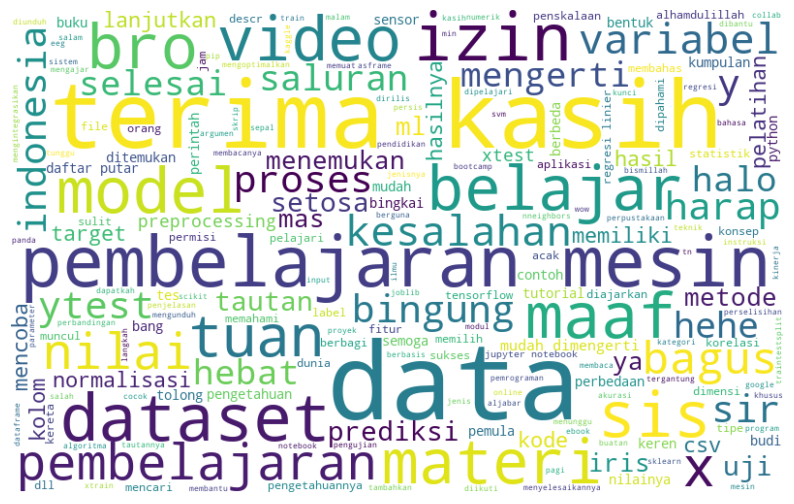

In [9]:
wordCloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white').generate(' '.join(preprocessed_df['tokenized_comments'].sum()))

plt.figure(figsize=(10, 7))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


## Vectorization

### Count Vectorizer

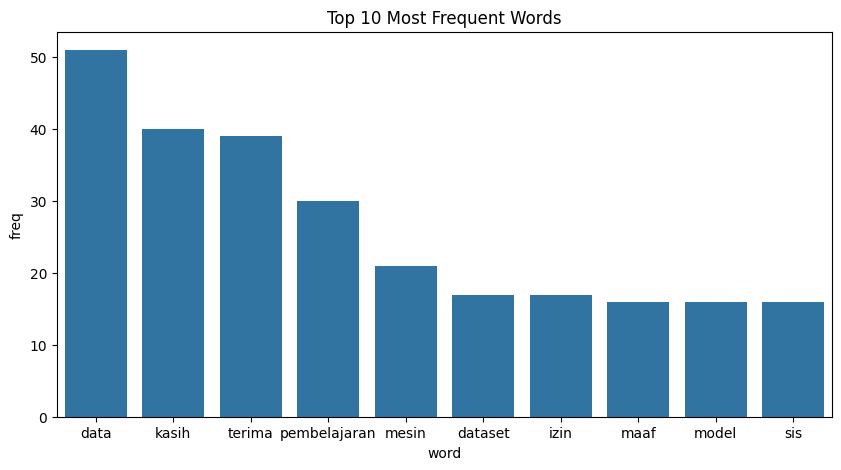

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(preprocessed_df['comments'])

word_freq = dict(zip(cv.get_feature_names_out(), np.asarray(X.sum(axis=0)).ravel()))

word_counter = Counter(word_freq)

word_counter_df = pd.DataFrame(word_counter.most_common(10), columns=['word', 'freq'])

plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='freq', data=word_counter_df)
plt.title('Top 10 Most Frequent Words')
plt.show()

### TF-IDF Vectorizer

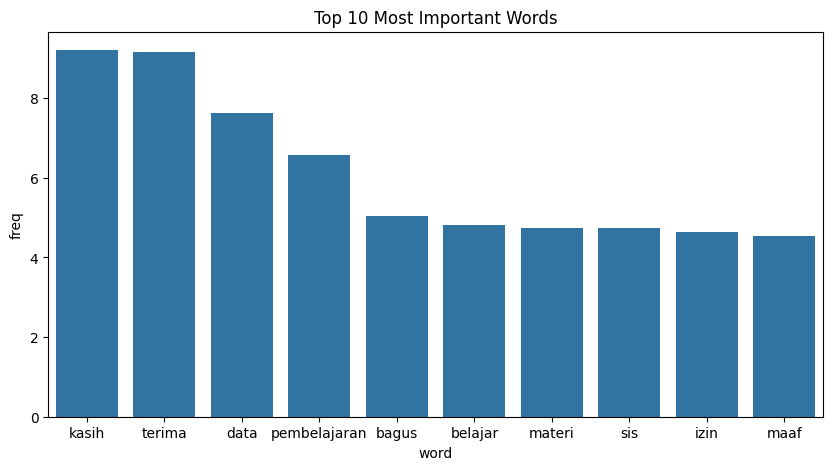

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(preprocessed_df['comments'])

word_freq = dict(zip(tfidf.get_feature_names_out(), np.asarray(X.sum(axis=0)).ravel()))

word_counter = Counter(word_freq)

word_counter_df = pd.DataFrame(word_counter.most_common(10), columns=['word', 'freq'])

plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='freq', data=word_counter_df)
plt.title('Top 10 Most Important Words')
plt.show()

### Word2Vec

In [12]:
from gensim.models import Word2Vec

word2vec = Word2Vec(sentences=preprocessed_df['tokenized_comments'], vector_size=100, window=5, min_count=1, workers=4)

model_vector = word2vec.wv

#### Visualize Word2Vec

##### 2D

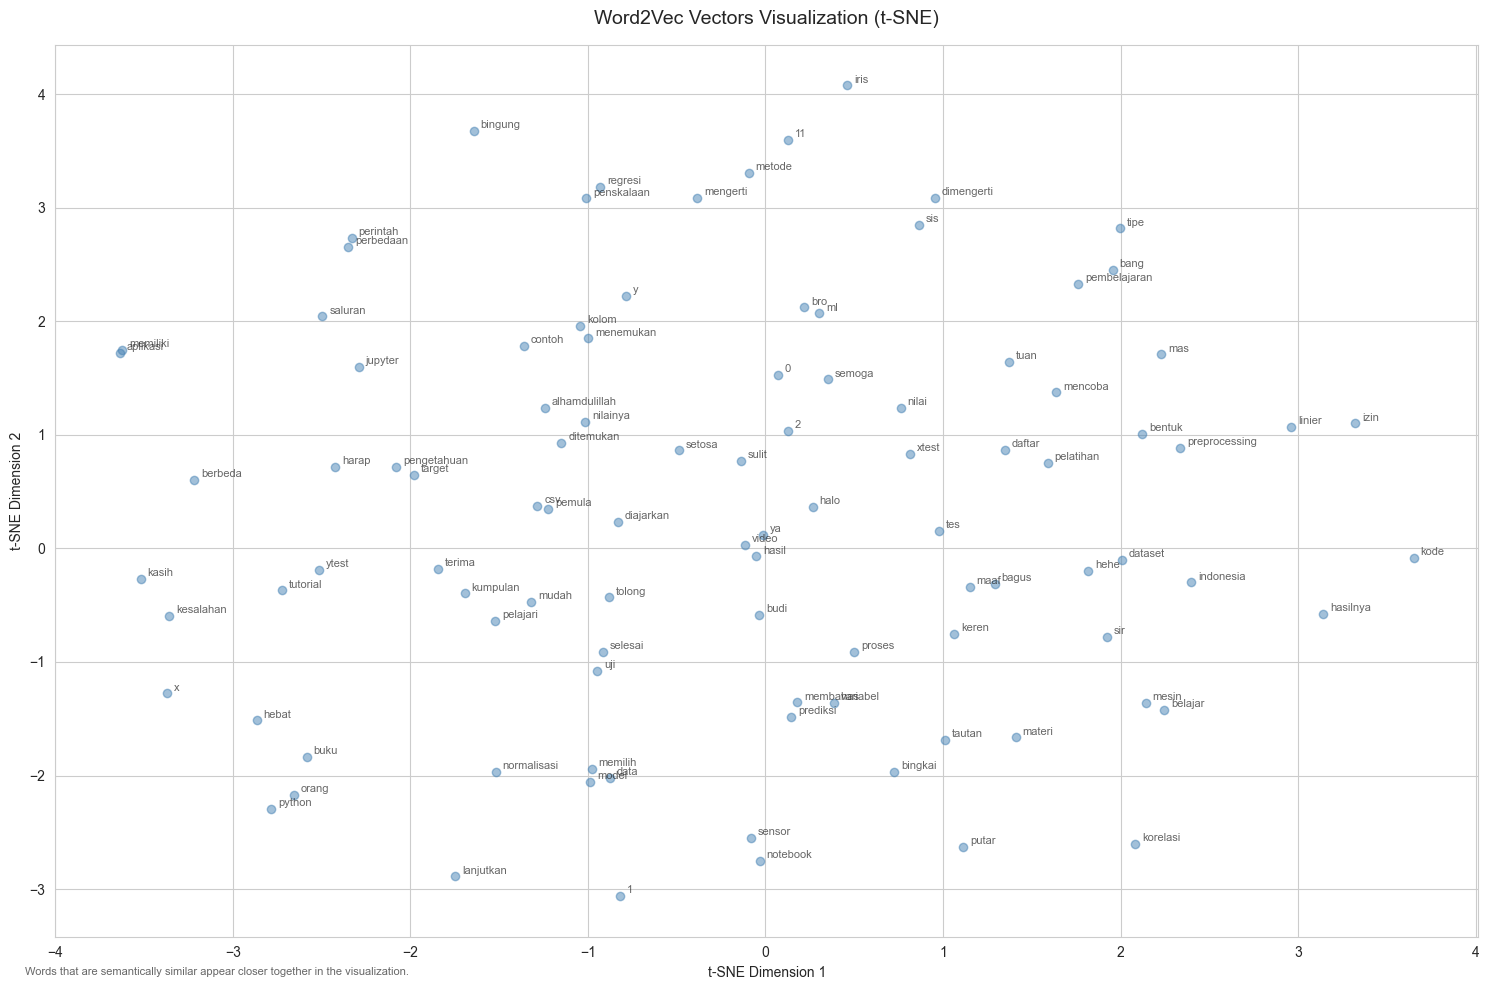

In [13]:
from sklearn.manifold import TSNE

def display_tsne_plot(model, num_words=100, perplexity=30, random_state=0) :
    words = model.index_to_key[:num_words]
    word_vectors = model.vectors[:num_words]
    
    # Perform t-SNE dimensionality reduction
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
    vectors_2d = tsne.fit_transform(word_vectors)
    
    # Create the visualization
    plt.figure(figsize=(15, 10))
    
    # Set style
    sns.set_style("whitegrid")
    
    # Create scatter plot
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='steelblue', alpha=0.5)
    
    # Add word labels
    for i, word in enumerate(words):
        plt.annotate(word,
                    xy=(vectors_2d[i, 0], vectors_2d[i, 1]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    fontsize=8,
                    alpha=0.7)
    
    plt.title("Word2Vec Vectors Visualization (t-SNE)", fontsize=14, pad=15)
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    
    # Add a brief explanation
    plt.figtext(0.02, 0.02, 
                "Words that are semantically similar appear closer together in the visualization.",
                fontsize=8, alpha=0.7)
    
    plt.tight_layout()
    return plt.show()

display_tsne_plot(model_vector, num_words=100, perplexity=30, random_state=0)

##### 3D

In [14]:
from plotly import graph_objects as go

def display_3d_plot(model, num_words=100, perplexity=30, random_state=0):
    # Get the most common words and their vectors
    words = model.index_to_key[:num_words]
    word_vectors = model.vectors[:num_words]
    
    # Perform t-SNE dimensionality reduction with 3 components
    tsne = TSNE(n_components=3, perplexity=perplexity, random_state=random_state)
    vectors_3d = tsne.fit_transform(word_vectors)
    
    # Create the 3D visualization using plotly
    fig = go.Figure(data=[
        go.Scatter3d(
            x=vectors_3d[:, 0],
            y=vectors_3d[:, 1],
            z=vectors_3d[:, 2],
            mode='markers+text',
            text=words,
            textposition='top center',
            hoverinfo='text',
            marker=dict(
                size=5,
                color=vectors_3d[:, 2],
                colorscale='Viridis',
                opacity=0.8
            ),
            textfont=dict(
                size=8,
                color='darkgrey'
            )
        )
    ])
    
    # Update layout for better visualization
    fig.update_layout(
        title='3D Word2Vec Vectors Visualization (t-SNE)',
        scene=dict(
            xaxis_title='t-SNE Dimension 1',
            yaxis_title='t-SNE Dimension 2',
            zaxis_title='t-SNE Dimension 3',
            camera=dict(
                up=dict(x=0, y=0, z=1),
                center=dict(x=0, y=0, z=0),
                eye=dict(x=1.5, y=1.5, z=1.5)
            )
        ),
        showlegend=False,
        margin=dict(l=0, r=0, b=0, t=30)
    )
    
    return fig

fig = display_3d_plot(model_vector, num_words=100)
fig.show()

## Conclusion